# Copy the data to your google drive
data
*italicized text*
https://drive.google.com/drive/folders/1MdZh6MC9s-UVIF_AZU6fAyEAM8XflnsT?usp=sharing

Go to drive.google.com.
On the left, click Shared with me.
Select the files or folders to which you want to add a shortcut.
Right click the files or folders you selected. Add shortcut to Drive.
Choose a folder.
Click Add shortcut.

<a href="https://colab.research.google.com/github/MAfarrag/HAPI/blob/master/Examples/03Jiboa-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install gdal
! pip install affine
! pip install fiona
! pip install proj
! pip install pyproj
! pip install pandas
! pip install geopandas
! pip install matplotlib-base
! pip install python
! pip install scipy
! pip install shapely
! pip install statsmodels
! pip install rasterio
! pip install rasterstats
! pip install oasis
! pip install netCDF4
! pip install scikit-learn
! pip install scikit-image
! pip install ecmwf-api-client
! pip install joblib
!pip install git+https://github.com/MAfarrag/HAPI.git

     |████████████████████████████████| 15.3MB 241kB/s 
     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 6.5MB 4.1MB/s 
     |████████████████████████████████| 1.0MB 5.6MB/s 
ERROR: Could not find a version that satisfies the requirement matplotlib-base (from versions: none)
ERROR: No matching distribution found for matplotlib-base
ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python
     |████████████████████████████████| 19.1MB 1.4MB/s 
     |████████████████████████████████| 133kB 6.2MB/s 
     |████████████████████████████████| 4.7MB 4.3MB/s 
     |████████████████████████████████| 317kB 32.3MB/s 
  Created wheel for ecmwf-api-client: filename=ecmwf_api_client-1.6.1-cp37-none-any.whl size=12619 sha256=6a0bff2c7fce85966d06d10e2d32deaac8d994359714a4e6edf488c51c02f583
  Stored in directory: /root/.cache/pip/wheels/5d/d0/c9/cef75ed33d0af19abb56f1df6b890ff

In [4]:
import datetime as dt
from Hapi.run import Run
from Hapi.catchment import Catchment
import Hapi.hbv_bergestrom92 as HBV

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import os
Path = "/content/drive/My Drive/Hapi"

os.chdir(Path)

In [8]:
os.listdir()

['Data', 'Model', 'requirement.txt']

In [11]:
# PrecPath = path + "meteodata/4000/calib/prec" #
PrecPath = Path + "/Data/00inputs/meteodata/4000/calib/prec-CPC-NOAA" #
# PrecPath = Path + "/Data/00inputs/meteodata/4000/calib/prec-MSWEP" #
Evap_Path = Path + "/Data/00inputs/meteodata/4000/calib/evap"
TempPath = Path + "/Data/00inputs/meteodata/4000/calib/temp"
FlowAccPath = Path + "/Data/00inputs/GIS/4000/acc4000.tif"
FlowDPath = Path + "/Data/00inputs/GIS/4000/fd4000.tif"
ParPathRun = Path + "/Model/results/parameters/02lumped parameters/Parameter set-1/"
# ParPathRun = Path + "/Model/results/parameters/02lumped parameters/Parameter set-Avg/"
SaveTo = Path + "/Model/results/"

In [13]:
AreaCoeff = 1530
InitialCond = [0,5,5,5,0]
Snow = 0
"""
Create the model object and read the input data
"""
start = "2009-01-01"
end = "2011-12-31"
name = "Coello"
Coello = Catchment(name, start, end, SpatialResolution = "Distributed")

In [14]:
Coello.ReadRainfall(PrecPath)
Coello.ReadTemperature(TempPath)
Coello.ReadET(Evap_Path)

Rainfall data are read successfully


In [18]:
Coello.ReadFlowAcc(FlowAccPath)
Coello.ReadFlowDir(FlowDPath)
Coello.ReadParameters(ParPathRun, Snow)
Coello.ReadLumpedModel(HBV, AreaCoeff, InitialCond)

Flow Accmulation input is read successfully
Flow Direction input is read successfully
Parameters are read successfully
Lumped model is read successfully


In [19]:
Coello.ReadGaugeTable(Path + "/Data/00inputs/Discharge/stations/gauges.csv", FlowAccPath)
GaugesPath = Path + "/Data/00inputs/Discharge/stations/"
Coello.ReadDischargeGauges(GaugesPath, column='id', fmt="%Y-%m-%d")

Gauge Table is read successfully
Gauges data are read successfully


In [20]:
Run.RunHapi(Coello)

Model Run has finished


In [21]:
Coello.ExtractDischarge(Factor=Coello.GaugesTable['area ratio'].tolist())

for i in range(len(Coello.GaugesTable)):
    gaugeid = Coello.GaugesTable.loc[i,'id']
    print("----------------------------------")
    print("Gauge - " +str(gaugeid))
    print("RMSE= " + str(round(Coello.Metrics.loc['RMSE',gaugeid],2)))
    print("NSE= " + str(round(Coello.Metrics.loc['NSE',gaugeid],2)))
    print("NSEhf= " + str(round(Coello.Metrics.loc['NSEhf',gaugeid],2)))
    print("KGE= " + str(round(Coello.Metrics.loc['KGE',gaugeid],2)))
    print("WB= " + str(round(Coello.Metrics.loc['WB',gaugeid],2)))
    print("Pearson CC= " + str(round(Coello.Metrics.loc['Pearson-CC',gaugeid],2)))
    print("R2 = " + str(round(Coello.Metrics.loc['R2',gaugeid],2)))

----------------------------------
Gauge - 1
RMSE= 7.55
NSE= -0.88
NSEhf= -0.74
KGE= -0.18
WB= 41.01
Pearson CC= 0.01
R2 = -0.88
----------------------------------
Gauge - 2
RMSE= 3.72
NSE= -0.4
NSEhf= -0.13
KGE= 0.09
WB= 81.98
Pearson CC= 0.02
R2 = -0.4
----------------------------------
Gauge - 3
RMSE= 2.36
NSE= -0.48
NSEhf= -0.36
KGE= -0.17
WB= 49.29
Pearson CC= 0.03
R2 = -0.48
----------------------------------
Gauge - 4
RMSE= 12.62
NSE= -1.18
NSEhf= -0.9
KGE= -0.22
WB= 29.66
Pearson CC= 0.05
R2 = -1.18
----------------------------------
Gauge - 5
RMSE= 26.98
NSE= -14.99
NSEhf= -5.14
KGE= -1.76
WB= -106.18
Pearson CC= 0.05
R2 = -14.99
----------------------------------
Gauge - 6
RMSE= 42.03
NSE= -1.57
NSEhf= -0.51
KGE= 0.08
WB= 62.0
Pearson CC= 0.06
R2 = -1.57


----------------------------------
Gauge - 6
RMSE= 42.03
NSE= -1.57
NSEhf= -0.51
KGE= 0.08
WB= 62.0
Pearson-CC= 0.06
R2= -1.57


(<Figure size 432x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4138e22cd0>)

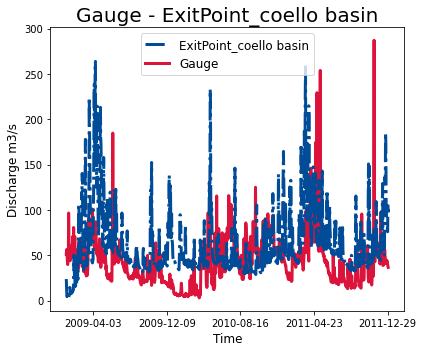

In [22]:
gaugei = 5
plotstart = "2009-01-01"
plotend = "2011-12-31"

Coello.PlotHydrograph(plotstart, plotend, gaugei)

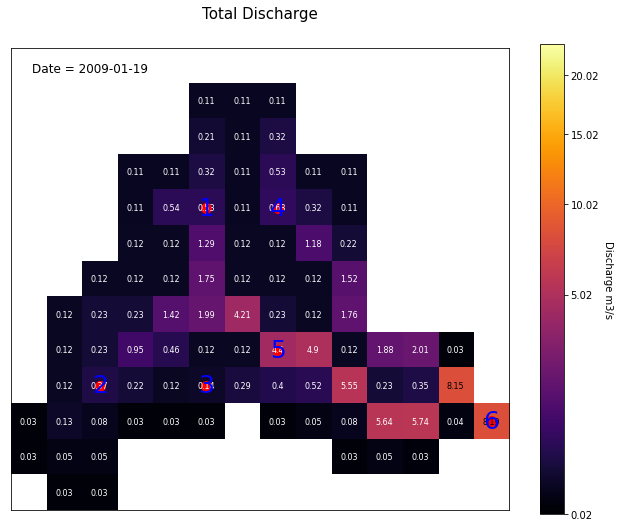

In [23]:
%matplotlib inline
from IPython.display import HTML
plotstart = "2009-01-01"
plotend = "2009-01-20"
Option = 1
threshold=10

Anim = Coello.PlotDistributedResults(plotstart, plotend, Figsize=(9,9), Option = Option, threshold=160, PlotNumbers=True,
                                TicksSpacing = 5,Interval = 200, Gauges=True, cmap='inferno', Textloc=[0.1,0.2],
                                Gaugecolor='red',ColorScale = 2, IDcolor='blue', IDsize=25)
HTML(Anim.to_html5_video())

In [ ]:
Path = SaveTo + "anim.mov"
Coello.SaveAnimation(VideoFormat="mov",Path=Path,SaveFrames=3)

In [31]:
StartDate = "2009-01-01"
EndDate = "2010-04-20"
Prefix = 'Qtot_'

Coello.SaveResults(FlowAccPath, Result=1, StartDate=StartDate, EndDate=EndDate, Path=SaveTo, Prefix=Prefix)

AttributeError: ignored

In [29]:
import gdal
f = gdal.Open(FlowAccPath)